In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df =pd.read_csv('../datasets/advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [74]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


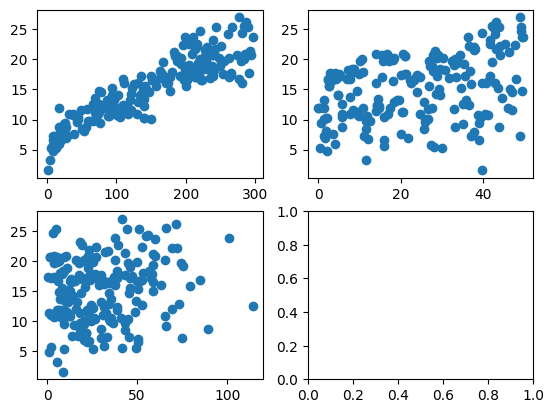

In [6]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(df.TV, df.Sales)
axes[0, 1].scatter(df.Radio, df.Sales)
axes[1, 0].scatter(df.Newspaper, df.Sales)


(array([ 2.,  9., 17., 30., 29., 30., 34., 30., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

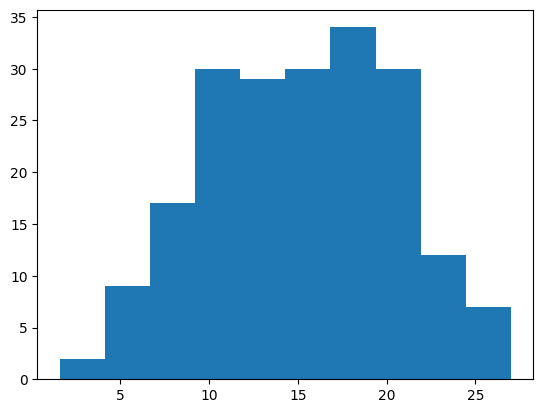

In [8]:
plt.hist(df.Sales)

In [18]:
from scipy import stats

(array([ 2.,  7., 18., 29., 30., 25., 40., 30., 12.,  7.]),
 array([ 0.59582028,  2.9684838 ,  5.34114732,  7.71381084, 10.08647436,
        12.45913788, 14.8318014 , 17.20446493, 19.57712845, 21.94979197,
        24.32245549]),
 <BarContainer object of 10 artists>)

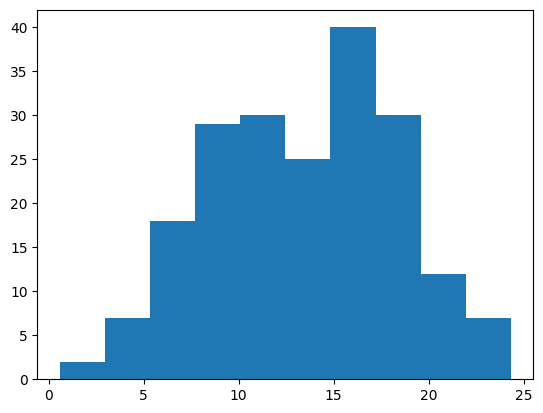

In [21]:
nd = stats.boxcox(df.Sales)
plt.hist(nd[0])

In [ ]:
#gradient decent for linear reg
def MSE_costFunc(X, y, w):
    total_loss = 0
    m = len(X)
    for i in range(m):
        y_hat = 0  
        for j in range(len(w)):
            y_hat += X[i][j] * w[j]
        loss = (y_hat - y[i]) ** 2  
        total_loss += loss
    return total_loss / m  

In [ ]:
def y_hat(Xi, w):
    y_hat = 0
    for j in range(len(w)):
        y_hat += Xi[j] * w[j] 
    return y_hat

def GD(X, y, w, lr, n_iters):
    m = len(X)
    cost_history = []
    
    for _ in range(n_iters):
        gradients = [0] * len(w)  
        
        for i in range(m):  
            y_pred = y_hat(X[i], w)  
            error = y_pred - y[i]  
            
            for j in range(len(w)):
                gradients[j] += (error * X[i][j]) / m
        for j in range(len(w)):
            w[j] -= lr * gradients[j]
    
        mse = MSE_costFunc(X, y, w)
        cost_history.append(mse)
    
    return w, cost_history

In [66]:
def y_hat(Xi, w):
    prediction = 0
    for j in range(len(w)):
        prediction += Xi[j] * w[j]
    return prediction

In [ ]:
def MSE_costFunc(X, y, w):
    total_loss = 0
    m = len(X)
    for i in range(m):
        y_pred = y_hat(X[i], w)
        loss = (y_pred - y[i]) ** 2  
        total_loss += loss
    return total_loss / m  

def GD(X, y, w, lr, n_iters):
    m = len(X)
    cost_history = []
    
    for _ in range(n_iters):
        gradients = [0] * len(w)  
        
        for i in range(m):  
            y_pred = y_hat(X[i], w)  
            error = y_pred - y[i]  
            
            for j in range(len(w)):
                gradients[j] += (error * X[i][j]) / m
        
        for j in range(len(w)):
            w[j] -= lr * gradients[j]
        
        mse = MSE_costFunc(X, y, w)
        cost_history.append(mse)
    
    return w, cost_history


In [70]:
split_ratio = 0.8
train_size = int(len(df) * split_ratio) 
X_train = df.iloc[:train_size, :-1].values
y_train = df.iloc[:train_size, -1].values   
X_test = df.iloc[train_size:, :-1].values  
y_test = df.iloc[train_size:, -1].values  

In [71]:
w = [0, 0, 0]
lr = 0.01  
n_iters = 1000 

In [72]:
w_final, cost_history = GD(X_train, y_train, w, lr, n_iters)

/tmp/ipykernel_68496/1594508151.py:7: RuntimeWarning: overflow encountered in scalar add
  total_loss += loss
/tmp/ipykernel_68496/1594508151.py:6: RuntimeWarning: overflow encountered in scalar power
  loss = (y_pred - y[i]) ** 2  # squared error
/tmp/ipykernel_68496/1594508151.py:25: RuntimeWarning: overflow encountered in scalar multiply
  gradients[j] += (error * X[i][j]) / m
/tmp/ipykernel_68496/1594508151.py:25: RuntimeWarning: invalid value encountered in scalar multiply
  gradients[j] += (error * X[i][j]) / m
/tmp/ipykernel_68496/1594508151.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  w[j] -= lr * gradients[j]


In [73]:
test_predictions = [y_hat(Xi, w_final) for Xi in X_test]
test_loss = MSE_costFunc(X_test, y_test, w_final)

print("Final weights:", w_final)
print("Test loss (MSE):", test_loss)

Final weights: [nan, nan, nan]
Test loss (MSE): nan


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X_train, X_text, y_train, y_test =train_test_split(df.iloc[: , :-1], df.iloc[: , -1],test_size=.2 , random_state=42)
lr.fit(X_train, y_train)
lr.predict(X_test)

/home/majid/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.07722174, 13.21321157, 16.92180225, 17.37327271, 12.60992766,
       18.2075123 ,  9.57905955, 16.59569044, 19.08752475, 21.30888748,
        8.69035045, 15.99621659,  7.88523289, 14.66570876, 17.23701254,
       24.92524356, 21.39081315, 14.93162809, 20.13179451, 14.82664026,
       13.54873033, 17.28833116,  8.4817344 , 25.04301452, 20.82881496,
       20.52616105, 12.64550975, 18.10690693, 21.72296399,  7.05636619,
       11.04124955,  9.94580615,  6.20259989, 18.06158993, 16.49383903,
        7.22972412, 10.37865883, 15.32881375, 24.69974685, 18.27158711])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = lr.predict(X_test)  

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



Mean Squared Error (MSE): 70.3112
Root Mean Squared Error (RMSE): 8.3852
Mean Absolute Error (MAE): 7.1620
R² Score: -1.2754


/home/majid/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
